# Segunda entrega

En esta segunda entrega vamos a hacer un análisis de reviews en Yelp.

Dado el siguiente dataset https://drive.google.com/file/d/1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE/view?usp=sharing:

In [7]:
#para descargarlo desde colab
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE' -O reviews.csv

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
#from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import plot_confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.metrics import accuracy_score
import spacy
#import os
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
# df = pd.read_csv('https://docs.google.com/uc?export=download&id=1sVeJE4zd1fmLnOgYI5QlQeaeaTGa8kIE')
df = pd.read_csv('CSV/reviews.csv')
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,"Excellent food. Superb customer service. I miss the mario machines they used to have, but it's still a great place steeped in tradition.",0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not opened on the weekend. But other than that the staff is always pleasant and fast to make your order. Which is always spot on fresh veggies on their hoggies and other food. They also have daily specials and ice cream which is really good. I had a banana split they piled the toppings on. They win pennysaver awards ever years i see why.,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,"All the food is great here. But the best thing they have is their wings. Their wings are simply fantastic!! The ""Wet Cajun"" are by the best & most popular. I also like the seasoned salt wings. Wing Night is Monday & Wednesday night, $0.75 whole wings!\n\nThe dining area is nice. Very family friendly! The bar is very nice is well. This place is truly a Yinzer's dream!! ""Pittsburgh Dad"" would love this place n'at!!",0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,"We checked this place out this past Monday for their wing night. We have heard that their wings are great and decided it was finally time to check it out. Their wings are whole wings and crispy, which is a nice change of pace. I got their wet Cajun sauce and garlic butter wings. The Cajun did not have a bold enough flavor for me and their sauce is too thin. The sauce was also thin for the garlic butter, but that is more expected. They were better than average, but I don't like seeing all the sauce resting at the bottom of the boat. I would definitely come try this place out again to sample some of the other items on the menu, but this will probably not become a regular stop for wings anytime soon.",0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


Deberán hacer un análisis de las reviews.

El análisis no tiene limites y pueden agregar todas las ideas que les surjan, pero como mínimo debe incluir: keywords y tópicos por negocio (business id), sentimiento de cada review, entidades por review, negocio con más comentarios positivos y negocio con más comentarios negativos.

Además, pueden agregar por ejemplo (Opcional): Tópicos asociados sentimientos, keywords asociadas a sentimientos, sentimientos a lo largo del tiempo (utilizando la columna date)...

### Entrega

**Fecha limite**: 26 de Diciembre. 

Deben compartir el notebook con todo el análisis realizado por mail a alexispacek@gmail.com.


### Presentación

**Fecha**: 28 de Diciembre.

La presentación NO debe ser una presentación del notebook. La presentación debe constar de filminas que muestren los **resultados** que obtuvieron, mencionar herramientas que utiliaron, que decisiones tomaron y conclusiones. No deben mostrar nada de código en la presentación.

Una vez que ya hayan presentado (por ejemplo un powerpoint), podemos resolver las dudas que surjan sobre código, etc.



# EDA

Empezamos a conocer: cantidad de filas y columnas, tipos de variables, valores nulos, etc.

In [4]:
df.shape

(27290, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27290 entries, 0 to 27289
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       27290 non-null  object
 1   review_id     27290 non-null  object
 2   text          27290 non-null  object
 3   votes.cool    27290 non-null  int64 
 4   business_id   27290 non-null  object
 5   votes.funny   27290 non-null  int64 
 6   stars         27290 non-null  int64 
 7   date          27290 non-null  object
 8   type          27290 non-null  object
 9   votes.useful  27290 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.1+ MB


In [74]:
df.isna().sum()

user_id         0
review_id       0
text            0
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
dtype: int64

In [59]:
df['business_id'].nunique()

1320

In [52]:
df['stars'].nunique()

5

In [51]:
df['votes.funny'].nunique()

27

In [70]:
df['votes.useful'].nunique()

28

In [53]:
df['type'].nunique()

1

Visualizamos distribución de algunos features

In [67]:
def graficar_countplot(df, features):
    ncount=len(df)    

    for i, feature in enumerate(features):

        plt.figure(figsize=(20,4))
        
        ax = sns.countplot(x=df[feature], order=df[feature].value_counts().iloc[:10].index)
        ax.set_title(f'Countplot {feature}',fontdict={'fontsize': 12,'fontweight':'bold'})
        ax.tick_params(axis='x', rotation=45)
        
        
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate('   {:.2f}% '.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom',rotation=45)
        
        plt.xticks(rotation=90)
        plt.show()

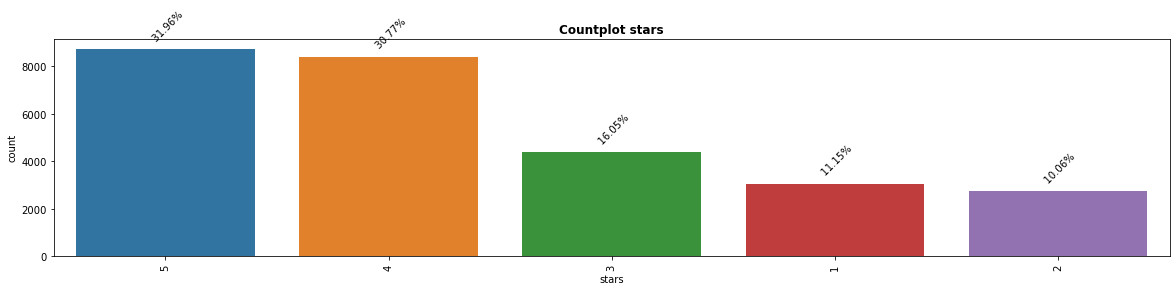

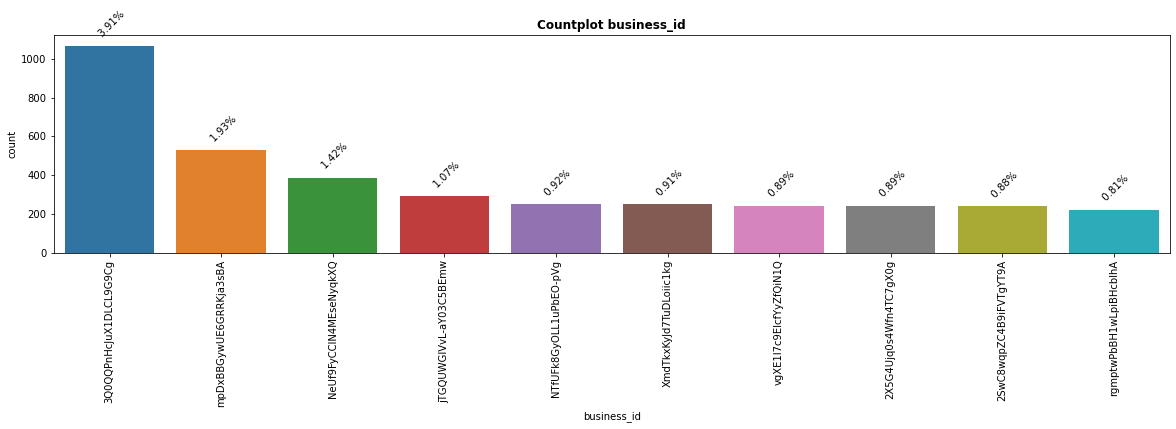

In [68]:
features = ['stars','business_id', '']

graficar_countplot(df, features)

# Preprocesamiento

Vamos a trabajar con la librería Spacy para limpiar los textos de signos de puntuación y caracteres especiales.

In [71]:
#Instancio nlp
nlp = spacy.load("en_core_web_sm")

In [81]:
def clean_text(text):
  clean_text = []
  for token in nlp(text):
    if (
        not token.is_stop
        and not token.is_punct
        
    ):
        clean_text.append(token.lemma_.lower())

  return " ".join(clean_text)

In [82]:
# Tarda 10 minutos
df['text_clean']=df['text'].astype(str).apply(clean_text)

Visualizamos con una wordcloud la frecuencia de palabras en las reviews.

In [83]:
from wordcloud import WordCloud, STOPWORDS
from scipy import stats

%matplotlib inline
def cloud(data,backgroundcolor = 'black', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

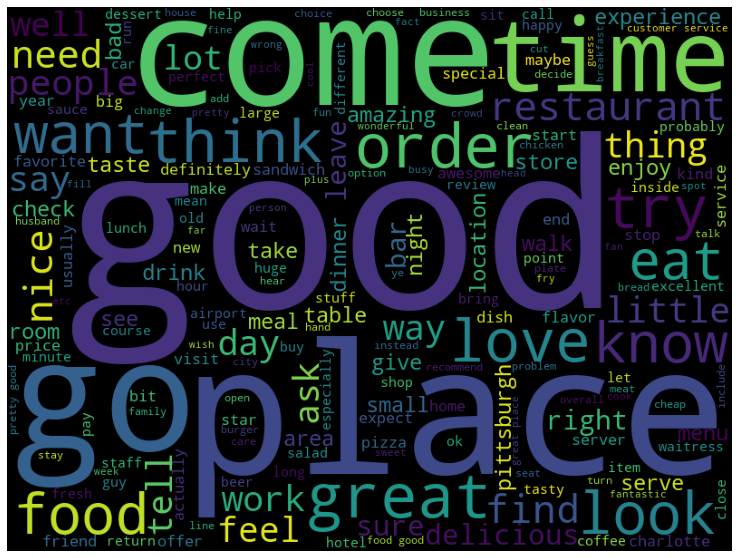

In [84]:
cloud(' '.join(df['text_clean']))

Agregamos stop words????

In [ ]:
# nlp.Defaults.stop_words.add("test")

✅ Visualizamos la frecuencia de palabras y las clases del target.

In [32]:
import plotly.express as px

In [85]:
# tardo 3 minutos
FreqOfWords = df['text_clean'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Top 200 palabras más frecuentes',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

c:\Users\Asus\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### NER

Named entity recognition (NER) es una técnica de NLP que automáticamente identifica entidades en un texto y las clasifica en alguna categoría predefinida.

 Una entidad puede ser:
- Nombres de personas
- Organizaciones
- Ubicaciones
- Fechas
- Cantidades
- Valores monetarios
- Porcentajes
- Y más..

Comenzaremos viendo como podemos extraer entidades de un texto con spacy.

Primero que nada debemos importar spacy y cargar el modelo que querramos usar, en este caso, inglés.

Definir una función que recibiendo un texto (str), retorne un listado de entidades (solo el nombre de la entidad, es decir, .text)

In [86]:
def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
      
  return ents

In [87]:
df["NER"] = df["text_clean"].apply(get_entities)

La siguiente celda, sirve para que cuando imprimamos un dataframe, pandas nos muestre el texto entero y no lo corte con "..."

In [35]:
pd.options.display.max_colwidth = 10000

In [91]:
df[['text', 'NER']].sample(10)

,text,NER
15442,"Full disclosure here, I'm part German, I'm married to a German, I've traveled to Germany once and I really love beer. Ok, so we hit up Waldhorn last night for my dad's 75th birthday and Oktoberfest. We had dinner inside before moving out to the tent. We got some apps to start, potato pancakes & a brats tray. The pancakes w/ apple sauce were fantastic, nice & crispy edges too. Brats were Brats, excellent. I also enjoyed the sauerkraut. For the entree, I ordered the Sauerbraten. It was ok. I didn't care for the spatzle, it was just a little soft for my liking but the red cabbage was tasty & the beef had good flavor but a little over cooked. Next time, I'll go with the brats! For dessert I had the apple strudel. Now this is a dessert!! I'll go back just for the apple strudel anytime, it was that good! Full of flavor w/ a nice sprinkle of cinnamon on top of everything, including the ice cream. Great presentation too! After dinner we moved to the tent. As some of the others have said, there were lines everywhere. Since we had dinner there, we got into the tent for free but still had to stand in line to buy beer tickets and then another line to buy beer. They moved pretty quickly. Oh, the beer was awesome. I was drinking the Oktoberfest. Lots of people under the tent and all around and everyone was having a good time. All in all, we had great time and it's as close to Germany as you'll find in the Charlotte area.","[german, german, germany, 75th, crispy edge brat, enjoy sauerkraut, dessert apple, germany, charlotte]"
6325,"i've always been and always will be a big fan and follower of lineage, tradition, and history. primanti is living tradition and history. no matter what, when in the burgh, you gotta have a primanti sandwich.\n\nevery town makes there own sandwich differently, their own hotdog differently, their own hamburger differently, their own barbeque, and their own pizza differently. primanti is known for its pile of meat, stacked with coleslaw and fries on top, sandwiched between two pieces of italian bread.\n\nthese sandwiches are HUGE. honestly i can't eat more than half of one because they are so filling. this is a great place to satisfy your munchies. \n\nits a great place to come after you've finished your shopping in the strip.","[fry sandwich, italian, half]"
12336,"FIVE STARS FOR LYDIA! Want a great waxing experience? Fast, easy, no pain? LYDIA is your answer! She is extremely nice and personable. When it comes to eyebrow waxing she considers what shape would be great for your face. Bikini and Brazilian waxes are efficient and little pain. \n\n I cannot express how much I recommend going to her for all your waxing needs. Also, she gives a great facial. I had acne going up and I went to her for facial extraction and it was great. She was so thorough and detailed. \n\nDon't take my word for it? Call Capristo Salon and ask for an appointment with Lydia. You will NOT be disappointed!",[brazilian]
546,"First off, I will say that I just moved here from California and was a big patron at the Rockbottom in Long Beach. I came to the Homestead location last night eager to see the beer at this location.\n\nNow, Rockbottom is a chain brewery, so a lot was the same... the menu, the food prices (yet beer is cheaper, and I am fine with that). I have always found their food to be pricey, but they use excellent ingredients and it has always been tasty and filling so I am fine with that. The food here was just as good as the Long Beach location, so I have no problem with the chef at all.\n\nService was good, our waitress was very friendly and helpful. I wish that they had asked us if we wanted to sit in the bar since happy hour was still going, but that isn't a big thing. Went to the bar to get a drink and had to wait awhile to get the bartender's attention, but he was very friendly and I got a nice welcome from him and others at the bar when they learned I had just moved here... I really enjoyed that.\n\nBeer: We go

EXPLODE.

En pandas, la función .explode() nos permite transformar una filas de un dataset que tienen una lista (como nuestra columna NER) en muchas filas (una por elemento en la lista).

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

Aplicarla a nuestra columna NER pero sin modificar el df original, guardar el resultado en otro df.


In [92]:
df_exploded = df.explode("NER")
df_exploded.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean,NER
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 year ago old fashioned menu board booth 70 large selection food speciality italian hoagie vote good area year year usually order burger patty obviously cook frozen ingredient fresh overall good alternative subway road,hoagie
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 year ago old fashioned menu board booth 70 large selection food speciality italian hoagie vote good area year year usually order burger patty obviously cook frozen ingredient fresh overall good alternative subway road,30 year ago old
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 year ago old fashioned menu board booth 70 large selection food speciality italian hoagie vote good area year year usually order burger patty obviously cook frozen ingredient fresh overall good alternative subway road,fashioned menu board
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like throwback 30 year ago old fashioned menu board booth 70 large selection food speciality italian hoagie vote good area year year usually order burger patty obviously cook frozen ingredient fresh overall good alternative subway road,70
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it does seem like a throwback to 30 years ago, old fashioned menu board, booths out of the 70s, and a large selection of food. Their speciality is the Italian Hoagie, and it is voted the best in the area year after year. I usually order the burger, while the patties are obviously cooked from frozen, all of the other ingredients are very fresh. Overall, its a good alternative to Subway, which is down the road.",0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0,mr hoagie institution walk like t

Ahora, agrupando por NER podemos obtener cuáles son las entidades que aparecen más frecuentemente en estas reviews... 

Obtener el top 20 de entidades más frecuentes.

In [126]:
df_exploded.groupby("NER").count().sort_values(by="text_clean", ascending=False).head(20)

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,text_clean
NER,,,,,,,,,,,
pittsburgh,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580,2580
2,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532,1532
italian,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510,1510
3,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334,1334
5,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259
night,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115
4,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049,1049
second,999,999,999,999,999,999,999,999,999,999,999
half,875,875,875,875,875,875,875,875,875,875,875


In [131]:
df_exploded[['review_id','NER']].groupby("NER").count().sort_values(by="review_id", ascending=False).head(20)

,review_id
NER,
pittsburgh,2580
2,1532
italian,1510
3,1334
5,1259
night,1115
4,1049
second,999
half,875


Top 20 de entidades más frecuentes por negocio.

In [106]:
df_exploded.groupby("business_id").agg({'NER':'count'}).sort_values(by="NER", ascending=False).head(20)

,NER
business_id,
3Q0QQPnHcJuX1DLCL9G9Cg,1907
mpDxBBGywUE6GRRKja3sBA,1107
NeUf9FyCCIN4MEseNyqkXQ,1105
XmdTkxKyJd7TuDLoiic1kg,920
rgmptwPbBH1wLpiBHcbIhA,871
n9iK0s1dKxv5JLi3u1eTkQ,813
2SwC8wqpZC4B9iFVTgYT9A,778
9SPwF-vRgtuHxciFxv5YLA,760
NTfUFk8GyOLL1uPbEO-pVg,692


In [124]:
# df_exploded.groupby(['business_id','NER']).count().sort_values(by="NER", ascending=False).head(20)

df_exploded.groupby(['business_id','NER'])['NER'].count()


business_id             NER                 
--UE_y6auTgq3FXlvUMkbw  1                       2
                        1 day                   1
                        1.75                    1
                        10                      5
                        10 12 minute            1
                                               ..
zxodsuIjtv3kx8mNa3sptQ  tomorrow                1
                        victoria   fantastic    1
                        week half week          1
                        year half               1
                        yesterday               1
Name: NER, Length: 49566, dtype: int64

# Part of speech

POS es el proceso mediante el cual vamos a clasificar a las palabras de un texto en categorías gramaticales. Para esto, los modelos se basan no solo en la palabra en sí, sino también en su contexto. Es decir, buscamos identificar sustantivos, verbos, adjetivos, etc dentro de un texto. 

Al igual que NER, para identificar POS en palabras de un texto, podemos utilizar los modelos de spacy que funcionan muy bien.

Veamos un ejemplo:

Definir una función que dado un texto, retorne una lista de todos sus sustantivos. En caso de que no contenga sustantivos, debe retornar lista vacia.

In [107]:
def get_nouns(text):
  doc = nlp(text)
  nouns = []
  for token in doc:
    if token.pos_ == "NOUN":
      nouns.append(token.text)
  return nouns

In [108]:
df["NOUNS"] = df["text_clean"].apply(get_nouns)

Habría que hacer un explode .....

In [128]:
df.groupby("business_id").agg({'NOUNS':'count'}).sort_values(by="NOUNS", ascending=False).head(20)

,NOUNS
business_id,
3Q0QQPnHcJuX1DLCL9G9Cg,1068
mpDxBBGywUE6GRRKja3sBA,527
NeUf9FyCCIN4MEseNyqkXQ,387
jTGQUWGIVvL-aY03C5BEmw,292
NTfUFk8GyOLL1uPbEO-pVg,250
XmdTkxKyJd7TuDLoiic1kg,249
vgXE1I7c9ElcfYyZfQiN1Q,243
2X5G4Ujq0s4Wfn4TC7gX0g,243
2SwC8wqpZC4B9iFVTgYT9A,239


In [130]:
df.groupby("NOUNS").count().sort_values(by="text_clean", ascending=False).head(20)

# Noun chunks

Spacy también nos permite extraer "noun chunks" de un texto.
Noun chunks son sustantivos en conjunto con cualquier palabra que dependa de ellos o los acompañe.

Crear una función que dado un texto retorne un listado de noun chunks. Luego aplicar la función al dataframe y almacenar resultados en la columna "NOUN_CHUNKS"

In [ ]:
def get_noun_chunks(text:str):
  doc = nlp(text)
  return [nc for nc in doc.noun_chunks]

In [ ]:
df["NOUN_CHUNKS"] = df["text_clean"].apply(get_noun_chunks)

In [ ]:
df.head()

# Text blob

Para análisis de sentimientos, podemos entrenar nuestros propios modelos (como la clase pasada) o utilizar modelos ya entrenados (textblob, modelos de proveedores cloud como aws, azure, gcp, etc).

En este caso utilizaremos textblob.

In [132]:
from textblob import TextBlob

Escribir una función get_sentiment que dado un texto, nos retorne:
- la palabra "POS" si polarity > 0.1
- la palabra "NEU" si polarity ≥ -0.1 & polarity ≤ 0.1
- la palabra "NEG" si polarity < -0.1

Luego aplicarla a todo el df y almacenar resultados en la columna "SENTIMENT"

In [ ]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"
  
  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [ ]:
df["SENTIMENT"] = df["text_clean"].apply(get_sentiment)

In [40]:
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,PUFPaY9KxDAcGqfsorJp3Q,Ya85v4eqdd6k9Od8HbQjyA,mr hoagie institution walking like throwback 30 years ago old fashioned menu board booths 70s large selection food speciality italian hoagie voted best area year year usually order burger patties obviously cooked frozen ingredients fresh overall good alternative subway road,0,5UmKMjUEUNdYWqANhGckJw,0,4,2012-08-01,review,0
1,Iu6AxdBYGR4A0wspR9BYHA,KPvLNJ21_4wbYNctrOwWdQ,excellent food superb customer service miss mario machines great place steeped tradition,0,5UmKMjUEUNdYWqANhGckJw,0,5,2014-02-13,review,0
2,auESFwWvW42h6alXgFxAXQ,fFSoGV46Yxuwbr3fHNuZig,yes place little dated opened weekend staff pleasant fast order spot fresh veggies hoggies food daily specials ice cream good banana split piled toppings win pennysaver awards years,0,5UmKMjUEUNdYWqANhGckJw,0,5,2015-10-31,review,0
3,uK8tzraOp4M5u3uYrqIBXg,Di3exaUCFNw1V4kSNW5pgA,food great best thing wings wings simply fantastic wet cajun best popular like seasoned salt wings wing night monday wednesday night $ 0.75 wings \n\n dining area nice family friendly bar nice place truly yinzer dream pittsburgh dad love place n'at,0,UsFtqoBl7naz8AVUBZMjQQ,0,5,2013-11-08,review,0
4,I_47G-R2_egp7ME5u_ltew,0Lua2-PbqEQMjD9r89-asw,checked place past monday wing night heard wings great decided finally time check wings wings crispy nice change pace got wet cajun sauce garlic butter wings cajun bold flavor sauce thin sauce thin garlic butter expected better average like seeing sauce resting boat definitely come try place sample items menu probably regular stop wings anytime soon,0,UsFtqoBl7naz8AVUBZMjQQ,0,3,2014-03-29,review,0


1) Cuántas ORACIONES hay asociadas a cada sentimiento (POS, NEG, NEU) ?

In [ ]:
df.groupby("SENTIMENT").agg({"SENTENCES": "sum"})

2) Cuáles son los 10 sustantivos más negativos? Y los más positivos? (Noun)

In [ ]:
noun_sentiments = df.explode("NOUNS").groupby(["NOUNS", "SENTIMENT"], as_index=False).agg({"TWEET": "count"})
noun_sentiments.head()

In [ ]:
noun_sentiments[noun_sentiments.SENTIMENT == "NEG"].sort_values(by="TWEET", ascending=False).head(10)

In [ ]:
noun_sentiments[noun_sentiments.SENTIMENT == "POS"].sort_values(by="TWEET", ascending=False).head(10)

6705    server said chicken parm sub white meat breade...
Name: text, dtype: object


# KeyBERT

Ahora vamos a analizar las keywords.

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()

- Top n: Cantidad de keywords por review
- keyphrase_ngram_range: Cantidad de palabras por keyword (keyphrase)

In [ ]:
df["KEYWORDS"] = df['text_clean'].apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

In [ ]:
df.head()

Podemos ver que además de la keyword, nos trae un score para cada keyword.

Vamos a eliminar el score y quedarnos únicamente con las kw:

In [ ]:
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [ ]:
df.head()

Ahora podemos ver la popularidad de las keywords:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.countplot(x=df.explode("KEYWORDS").KEYWORDS, 
              order=df.explode("KEYWORDS").KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

# BERTopic

Ahora utilizaremos BERTopic para extraer tópicos.

In [ ]:
from bertopic import BERTopic

In [ ]:
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["text_clean"].values)

In [ ]:
topics_data = topic_model.get_topic_info()
topics_data

El topico -1 corresponde a outliers.

In [ ]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head(3)

In [ ]:
topic_model.visualize_topics()